<a href="https://colab.research.google.com/github/rosselladedo/TesiMagistrale/blob/main/Tesi_Magistrale_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Main**

In [ ]:
pip install pandasql


In [ ]:
# Import pandas and dataFrame
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sb
import re

# Import matplotlib and seaborn for histograms, boxplots, and
# scatterplots
import matplotlib.pyplot as plt
import seaborn

# Sql packages
from pandasql import sqldf
from sqlalchemy import create_engine

# Import packages for regression analysis
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

In [ ]:
#from google.colab import files


#uploaded = files.upload()

In [ ]:
#Leggo dataset
df_original= pd.read_csv("/content/drive/MyDrive/Tesi/World Energy Consumption.csv")



In [ ]:
df=df_original.copy()

# Info generali sul database #

In [ ]:
df_head = df.head()
df_info = df.info()

df_head, df_info

In [ ]:
df.head(10)


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN
5,ASEAN (Ember),2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.02,NaN,0.004,NaN
6,ASEAN (Ember),2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.05,NaN,0.009,NaN
7,ASEAN (Ember),2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.06,NaN,0.011,NaN
8,ASEAN (Ember),2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.06,NaN,0.010,NaN
9,ASEAN (Ember),2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.002,NaN,NaN,NaN,NaN,NaN,0.07,NaN,0.011,NaN


In [ ]:
num_righe, num_colonne = df.shape
print(f"Il dataset contiene {num_righe} righe e {num_colonne} colonne.")


Il dataset contiene 22012 righe e 129 colonne.


In [ ]:
df.dtypes.groupby(df.dtypes).count()


,0
int64,1
float64,126
object,2


# Analisi esplorativa

In [ ]:
# Statistiche descrittive
description = df.describe(include='all')
description

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
count,22012,22012.000000,16512,1.812300e+04,1.111300e+04,1747.000000,2687.000000,2302.000000,2767.000000,5275.000000,...,6849.000000,4035.000000,2413.000000,4639.000000,4744.000000,7065.000000,7996.000000,4065.000000,6886.000000,4101.000000
unique,306,NaN,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Zimbabwe,NaN,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,123,NaN,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1974.213247,NaN,1.053096e+08,3.585114e+11,46.091694,2.719074,133.558459,38.068209,64.716800,...,0.622750,0.210395,267.541206,7.314174,53.422938,62.811828,17.561153,232.108949,1.404910,0.651413
std,NaN,35.058653,NaN,4.640460e+08,2.411179e+12,274.616745,10.057018,264.707851,111.623148,201.043915,...,2.066186,0.643304,5940.944120,37.327922,273.255306,252.734217,101.693172,733.841324,4.489043,1.893820
min,NaN,1900.000000,NaN,1.833000e+03,1.642060e+08,-100.000000,-50.843000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-100.000000,-51.208000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1946.000000,NaN,1.712404e+06,1.365898e+10,-0.616500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,4.029000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,1984.000000,NaN,6.991543e+06,4.167411e+10,8.179000,0.000000,15.482000,0.673000,0.146000,...,0.000000,0.000000,20.000000,0.000000,0.005000,0.000000,0.000000,0.051000,0.000000,0.003000
75%,NaN,2003.000000,NaN,2.557688e+07,1.744295e+11,26.508500,0.861500,165.266750,13.629500,34.289000,...,0.095000,0.018500,47.971000,0.315000,2.357750,2.101000,0.140000,45.523000,0.372000,0.268000


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22012 entries, 0 to 22011
Columns: 129 entries, country to wind_share_energy
dtypes: float64(126), int64(1), object(2)
memory usage: 21.7+ MB
None


In [ ]:
df.isnull().sum()

,0
country,0
year,0
iso_code,5500
population,3889
gdp,10899
...,...
wind_elec_per_capita,14947
wind_electricity,14016
wind_energy_per_capita,17947
wind_share_elec,15126



L'output di dataset.isnull().sum():

Le colonne 'country' e 'year' non presentano valori nulli/mancanti ->  identificatori chiave.
Diverse colonne con dati mancanti:
La popolazione ha 3889 valori nulli.
'iso_code' ha 5500 valori nulli.
'gdp' ha 10899 valori nulli.
Le colonne relative all'energia eolica, come 'wind_elec_per_capita', hanno circa 14000-17000 valori nulli.

Questa analisi dei dati mancanti mostra che, anche se il dataset copre un lungo periodo, ci sono molte lacune in variabili come il PIL, la popolazione e l'energia eolica, tra i diversi paesi e anni. Gestire i dati mancanti sarà importante, usando tecniche come l’imputazione, il filtraggio o tenendo conto di queste lacune durante la modellazione.

In [ ]:
df.describe()

,year,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
count,22012.000000,1.812300e+04,1.111300e+04,1747.000000,2687.000000,2302.000000,2767.000000,5275.000000,5527.000000,5492.000000,...,6849.000000,4035.000000,2413.000000,4639.000000,4744.000000,7065.000000,7996.000000,4065.000000,6886.000000,4101.000000
mean,1974.213247,1.053096e+08,3.585114e+11,46.091694,2.719074,133.558459,38.068209,64.716800,10.966685,1.954035,...,0.622750,0.210395,267.541206,7.314174,53.422938,62.811828,17.561153,232.108949,1.404910,0.651413
std,35.058653,4.640460e+08,2.411179e+12,274.616745,10.057018,264.707851,111.623148,201.043915,47.953561,5.274155,...,2.066186,0.643304,5940.944120,37.327922,273.255306,252.734217,101.693172,733.841324,4.489043,1.893820
min,1900.000000,1.833000e+03,1.642060e+08,-100.000000,-50.843000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-100.000000,-51.208000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1946.000000,1.712404e+06,1.365898e+10,-0.616500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,4.029000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1984.000000,6.991543e+06,4.167411e+10,8.179000,0.000000,15.482000,0.673000,0.146000,0.010000,0.062000,...,0.000000,0.000000,20.000000,0.000000,0.005000,0.000000,0.000000,0.051000,0.000000,0.003000
75%,2003.000000,2.557688e+07,1.744295e+11,26.508500,0.861500,165.266750,13.629500,34.289000,0.690000,1.577500,...,0.095000,0.018500,47.971000,0.315000,2.357750,2.101000,0.140000,45.523000,0.372000,0.268000
max,2022.000000,7.975105e+09,1.136302e+14,5659.328000,141.131000,2588.512000,1199.207000,2514.102000,677.570000,71.429000,...,40.000000,7.586000,242384.844000,665.413000,5487.600000,3219.852000,2139.230000,8422.012000,56.840000,26.157000



Il periodo di analisi va dal 1900 al 2022.  
Popolazione e PIL presentano ampie variazioni, con valori sia molto bassi che molto alti.  

La maggior parte delle colonne che trattano la quota di fonti rinnovabili (biocarburanti, solare, eolico) e il loro cambiamento percentuale ha una mediana di 0, suggerendo che per molti paesi queste fonti sono ancora relativamente nuove.

I dati sul consumo di biocarburanti mostrano valori medi all'interno di un intervallo, ma i quartili al 75% arrivano fino a centinaia, indicando che alcuni paesi o anni hanno un consumo molto elevato di biocarburanti.  

Il massimo consumo di biocarburanti pro capite è di 2588.  

Tuttavia, il massimo del consumo di energia eolica di 5487 TWh e la quota massima del 56,84% di elettricità prodotta dal vento indicano che alcuni paesi sono leader nell'energia eolica.  

Le alte deviazioni standard e i massimi valori rispetto alle medie/mediane in molte colonne mostrano una distribuzione molto variabile e la presenza di valori anomali (outlier).  

In [ ]:
# Seleziono alcune colonne di interesse
columns_of_interest = ['country', 'year', 'population', 'gdp', 'renewables_consumption',
                       'solar_consumption', 'wind_consumption', 'hydro_consumption']

# Verifico se le colonne esistono nel dataset
columns_available = [col for col in columns_of_interest if col in df.columns]

# Esploro le colonne disponibili
data_specific = df[columns_available].describe(include='all')

# Mostro le colonne disponibili e le statistiche descrittive
print("Colonne disponibili:", columns_available)
print("\nStatistiche descrittive:")
print(data_specific)

##Focus colonne popolazione e PIL


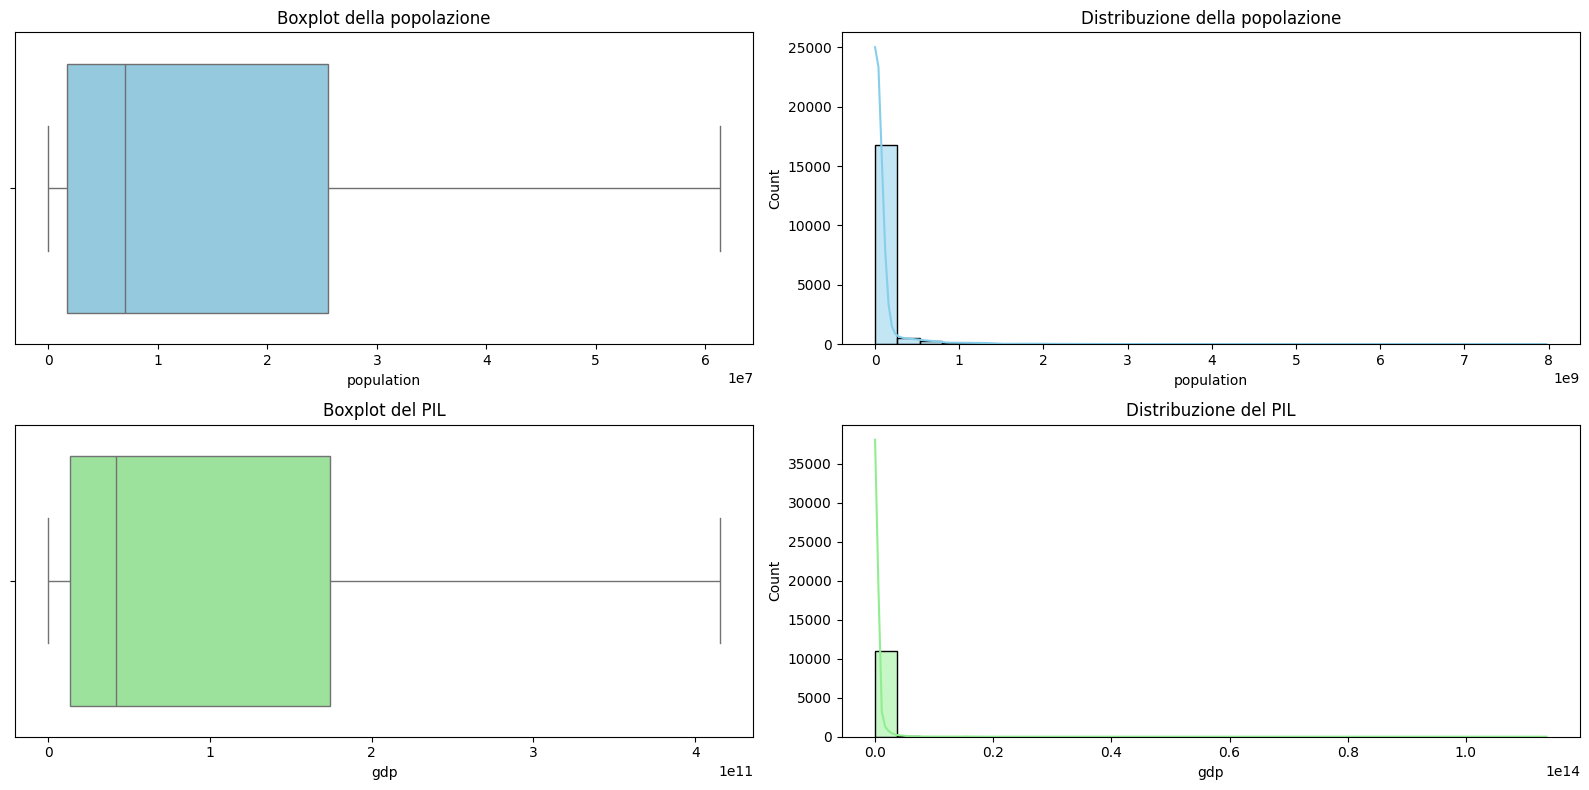

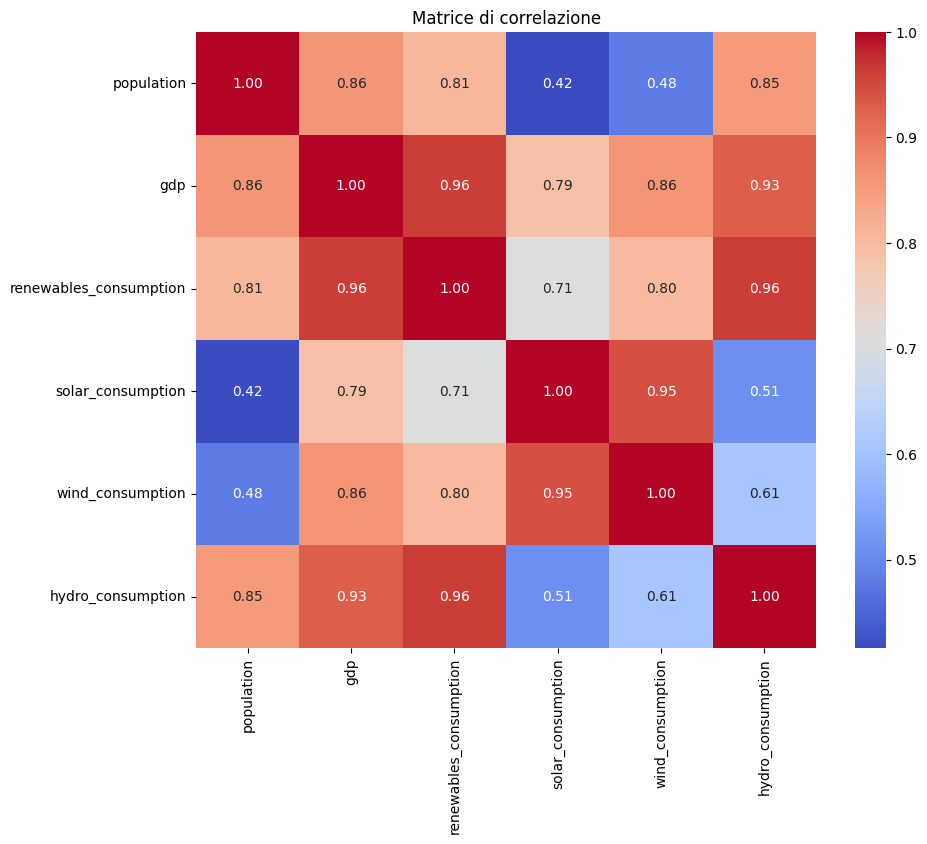

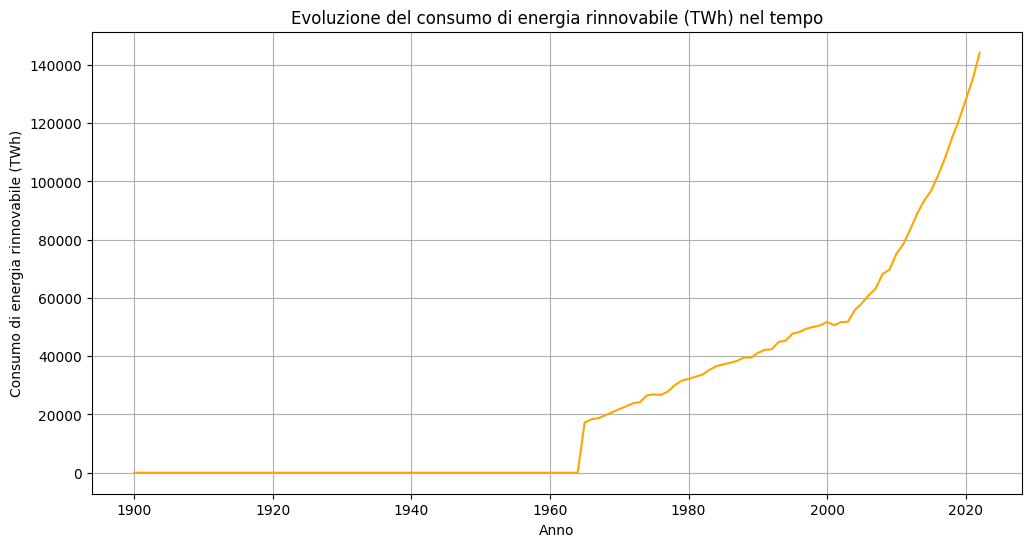

,0
biofuel_cons_change_pct,92.063420
solar_cons_change_pct,90.350718
biofuel_cons_per_capita,89.542068
wind_cons_change_pct,89.037798
nuclear_cons_change_pct,88.792477
...,...
gas_prod_change_twh,24.968199
gas_production,23.809740
oil_prod_change_twh,22.097038
oil_production,20.929493


In [ ]:

# 1. Analisi dei valori mancanti
missing_data = df.isnull().mean().sort_values(ascending=False) * 100
missing_data_summary = missing_data[missing_data > 0]

# 2. Distribuzione della popolazione e del PIL (boxplot e istogrammi)
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x=df['population'], showfliers=False, color='skyblue')
plt.title('Boxplot della popolazione')

plt.subplot(2, 2, 2)
sns.histplot(df['population'], bins=30, kde=True, color='skyblue')
plt.title('Distribuzione della popolazione')

plt.subplot(2, 2, 3)
sns.boxplot(x=df['gdp'], showfliers=False, color='lightgreen')
plt.title('Boxplot del PIL')

plt.subplot(2, 2, 4)
sns.histplot(df['gdp'], bins=30, kde=True, color='lightgreen')
plt.title('Distribuzione del PIL')

plt.tight_layout()
plt.show()

# 3. Correlazione tra popolazione, PIL e consumo energetico da fonti rinnovabili
correlation_columns = ['population', 'gdp', 'renewables_consumption',
                       'solar_consumption', 'wind_consumption', 'hydro_consumption']
correlation_data = df[correlation_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Matrice di correlazione')
plt.show()

# 4. Evoluzione del consumo energetico da fonti rinnovabili nel tempo
renewables_trend = df.groupby('year')['renewables_consumption'].sum()

plt.figure(figsize=(12, 6))
renewables_trend.plot(kind='line', color='orange')
plt.title('Evoluzione del consumo di energia rinnovabile (TWh) nel tempo')
plt.xlabel('Anno')
plt.ylabel('Consumo di energia rinnovabile (TWh)')
plt.grid()
plt.show()

missing_data_summary


In [ ]:
#df.select_dtypes(exclude = ['float64']).head(3)


In [ ]:
df.groupby(df['country']).count().head(3)


,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
country,,,,,,,,,,,,,,,,,,,,,
ASEAN (Ember),23,0,0,0,0,0,0,0,0,23,...,23,0,0,0,0,0,23,0,23,0
Afghanistan,122,122,122,69,0,0,0,0,22,22,...,22,0,0,0,0,22,22,0,22,0
Africa,123,0,123,0,20,32,33,33,22,22,...,38,52,29,57,58,58,58,58,38,58


## Focus energia pro capite

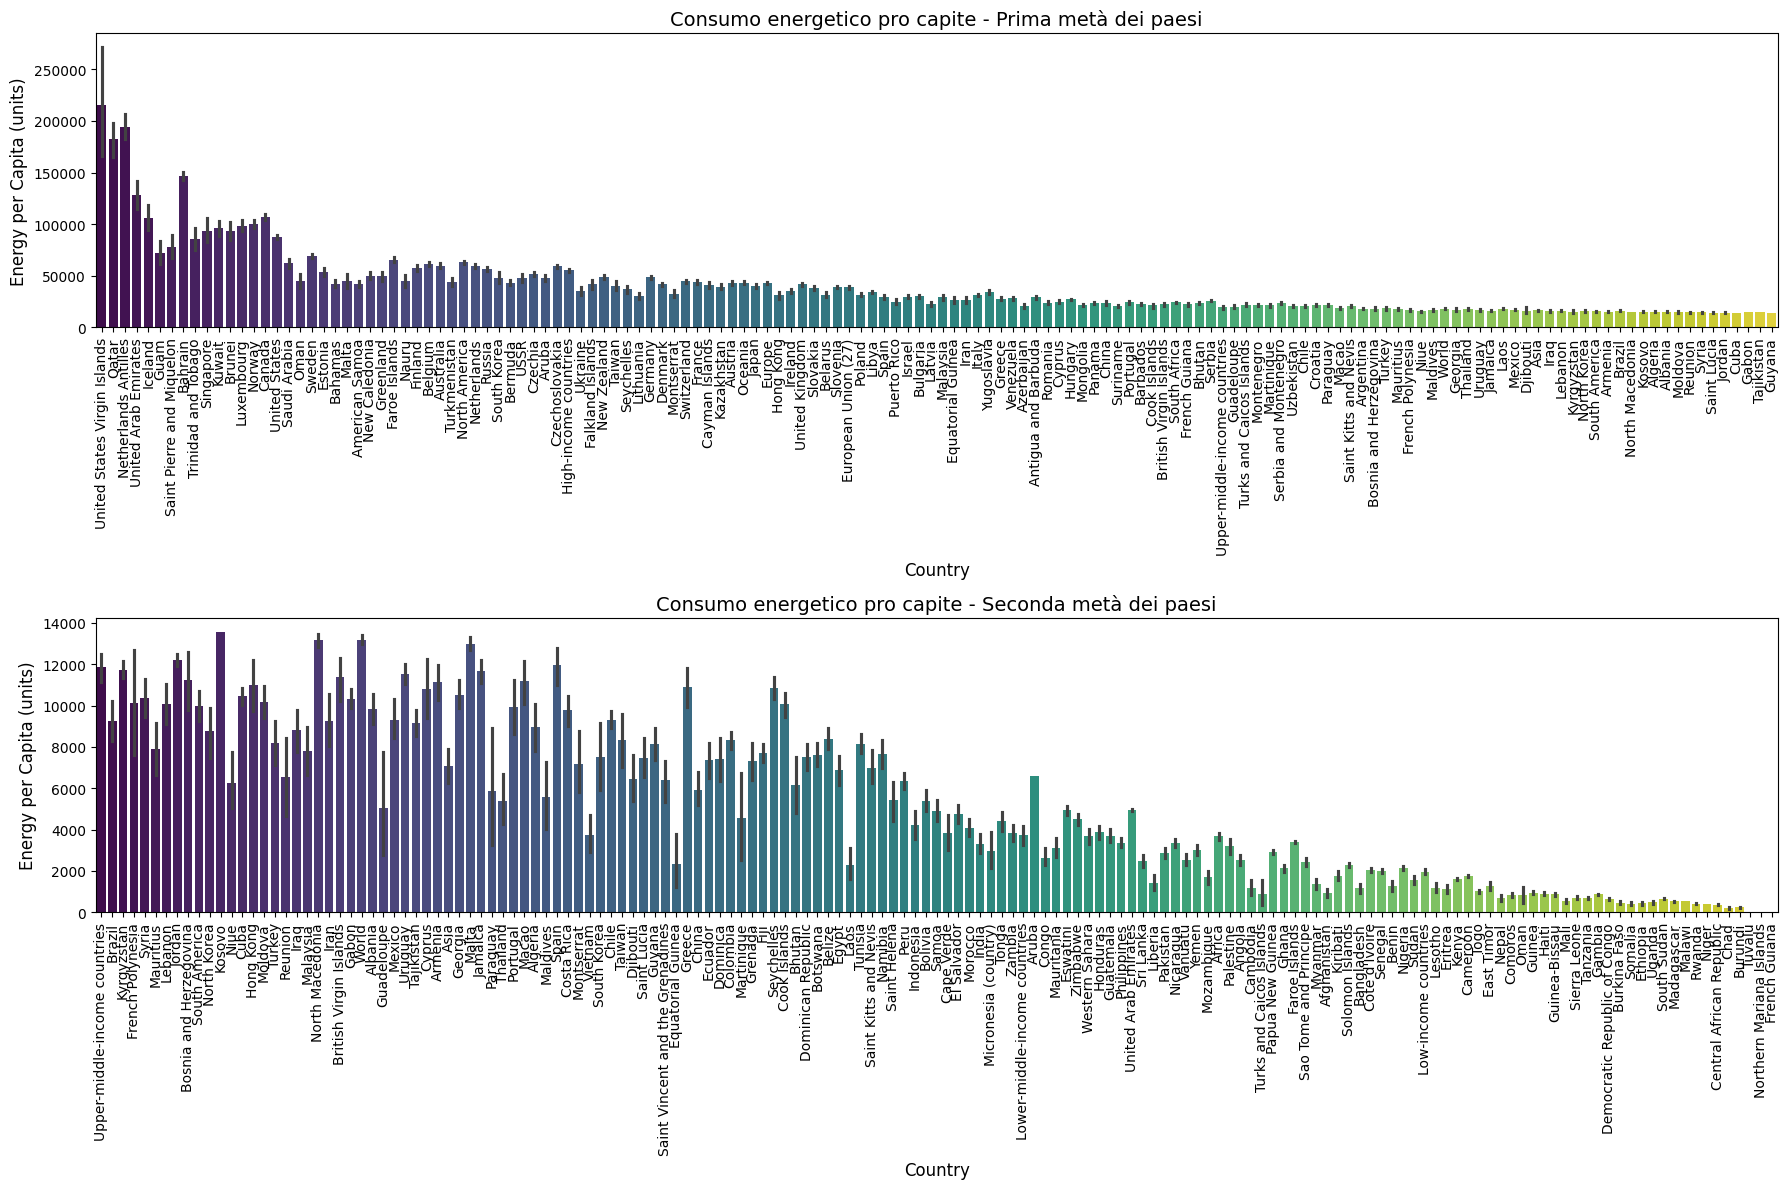

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtra le righe con valori "energia_pro_capite" mancanti
dataset_filtered = df[df['energy_per_capita'].notna()]

# Ordina i paesi per consumo energetico pro capite, se necessario
dataset_filtered = dataset_filtered.sort_values('energy_per_capita', ascending=False)

# Dividi il dataset in due metà
half = len(dataset_filtered) // 2
dataset_first_half = dataset_filtered.iloc[:half]
dataset_second_half = dataset_filtered.iloc[half:]

# Crea due subplots uno sotto l'altro
fig, axes = plt.subplots(2, 1, figsize=(18, 12))  # Due righe, una colonna

# Primo grafico (prima metà dei paesi)
sns.barplot(data=dataset_first_half, x='country', y='energy_per_capita', ax=axes[0], hue='country', palette='viridis', legend=False)
axes[0].set_title('Consumo energetico pro capite - Prima metà dei paesi', fontsize=14)
axes[0].set_xlabel('Country', fontsize=12)
axes[0].set_ylabel('Energy per Capita (units)', fontsize=12)
axes[0].tick_params(axis='x', rotation=90)

# Secondo grafico (seconda metà dei paesi)
sns.barplot(data=dataset_second_half, x='country', y='energy_per_capita', ax=axes[1], hue='country', palette='viridis', legend=False)
axes[1].set_title('Consumo energetico pro capite - Seconda metà dei paesi', fontsize=14)
axes[1].set_xlabel('Country', fontsize=12)
axes[1].set_ylabel('Energy per Capita (units)', fontsize=12)
axes[1].tick_params(axis='x', rotation=90)

# Ottimizza la disposizione degli elementi
plt.tight_layout()

# Mostra il grafico
plt.show()


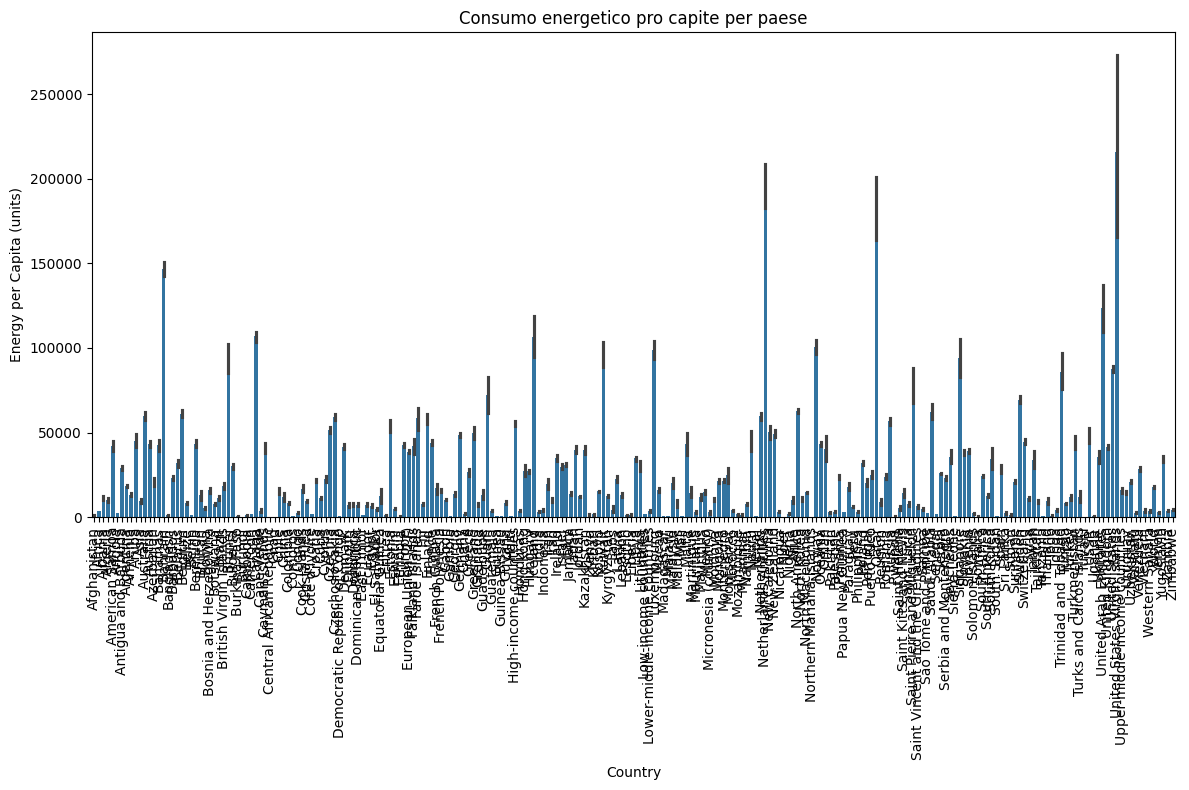

In [ ]:
###grafico non leggibile ho provato a separarlo sopra --> eventualmente eliminare
#Filtra le righe con valori "energia_pro_capite" mancanti
dataset_filtered = df[df['energy_per_capita'].notna()]

# Plot energy consumption per capita across countries ---renderlo più leggibile
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=dataset_filtered, x='country', y='energy_per_capita', ax=ax)
ax.set_title('Consumo energetico pro capite per paese')
ax.set_xlabel('Country')
ax.set_ylabel('Energy per Capita (units)')
plt.xticks(rotation=90)
plt.tight_layout()

**Mappa dei continenti:** Viene creato un dizionario che associa ciascun paese al continente corrispondente.

**Filtraggio dei dati:** Vengono rimosse le righe in cui manca il valore 'energy_per_capita'.

**Aggiunta della colonna 'continent':** Si mappa ogni paese al continente di appartenenza utilizzando la mappa dei continenti.

**Creazione del grafico a barre:** Si crea il grafico a barre visualizzando il consumo energetico pro capite per continente.

**Impostazioni di formato:** Si aggiungono titoli e etichette, si ruotano le etichette dell'asse x e si ottimizza il layout per una migliore visibilità.

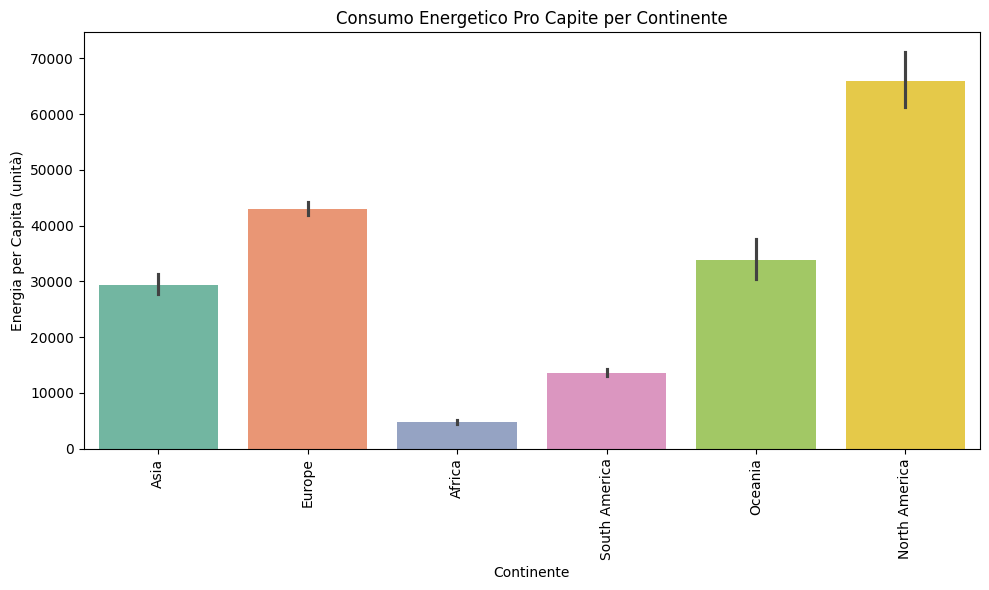

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mappa dei continenti
continent_map = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Cote d\'Ivoire', 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'],
    'North America': ['Canada', 'Greenland', 'Mexico', 'United States'],
    'Oceania': ['Australia', 'Fiji', 'New Zealand', 'Papua New Guinea'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
}

# Filtra le righe con valori mancanti in 'energy_per_capita'
dataset_filtered = df[df['energy_per_capita'].notna()].copy()  # Usa .copy() per evitare il warning

# Aggiungi una colonna 'continent' al dataset
continent_series = dataset_filtered['country'].map(lambda x: next((k for k, v in continent_map.items() if x in v), None))
dataset_filtered['continent'] = continent_series  # Ora questo non dovrebbe causare il warning

# Crea il grafico a barre sul consumo energetico pro capite per continente con colori differenti
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=dataset_filtered, x='continent', y='energy_per_capita', ax=ax, hue='continent', palette='Set2', legend=False)

# Imposta il titolo e le etichette degli assi
ax.set_title('Consumo Energetico Pro Capite per Continente')
ax.set_xlabel('Continente')
ax.set_ylabel('Energia per Capita (unità)')

# Ruota le etichette sull’asse x per una migliore leggibilità
plt.xticks(rotation=90)

# Ottimizza la disposizione del grafico
plt.tight_layout()

# Mostra il grafico
plt.show()


## Focus Paesi

**Anni**

In [ ]:

print(f"Il dataset ha un arco temporale di {df.year.nunique()} anni ")


Il dataset ha un arco temporale di 123 anni 


**Paesi**

In [ ]:
print(f"Il dataset ha  {df.country.nunique()} paesi ")


Il dataset ha  306 paesi 


**Paesi con più elementi**

In [ ]:

df.groupby(df['country']).count().sum(axis = 1).sort_values(ascending = False)


,0
country,
Poland,7418
United Kingdom,7324
Italy,7322
Japan,7293
Spain,7271
...,...
U.S. Territories (EIA),119
Serbia and Montenegro,82
East Germany (EIA),42


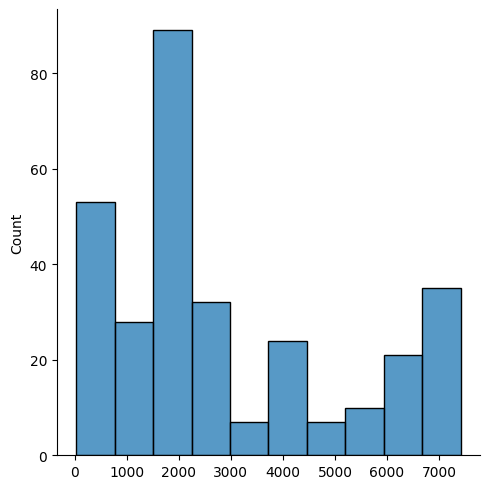

In [ ]:
#distribuzione delle features per continenti
sb.displot(df.groupby(df['country']).count().sum(axis = 1))


In [ ]:
df.groupby(df['country']).count().sum(axis = 1).sort_values(ascending = False).quantile(.9)


6799.0

**Focus primi 25 paesi per features**

In [ ]:
#visiono i primi 25 paesi per numerosità di features
top_25_series = df.groupby(df['country']).count().sum(axis = 1).sort_values(ascending = False).head(25)
top_25_list = df.groupby(df['country']).count().sum(axis = 1).sort_values(ascending = False).head(25).index.tolist()
top_25_series

,0
country,
Poland,7418
United Kingdom,7324
Italy,7322
Japan,7293
Spain,7271
World,7247
High-income countries,7236
Mexico,7224
Upper-middle-income countries,7215


In [ ]:
#info dataset tabellare
df_top_25= df[df['country'].isin(top_25_list)]
df_top_25.shape

(3075, 129)

In [ ]:
#colonne del dataset
for i in df_top_25.columns:
    print(i)

country
year
iso_code
population
gdp
biofuel_cons_change_pct
biofuel_cons_change_twh
biofuel_cons_per_capita
biofuel_consumption
biofuel_elec_per_capita
biofuel_electricity
biofuel_share_elec
biofuel_share_energy
carbon_intensity_elec
coal_cons_change_pct
coal_cons_change_twh
coal_cons_per_capita
coal_consumption
coal_elec_per_capita
coal_electricity
coal_prod_change_pct
coal_prod_change_twh
coal_prod_per_capita
coal_production
coal_share_elec
coal_share_energy
electricity_demand
electricity_generation
electricity_share_energy
energy_cons_change_pct
energy_cons_change_twh
energy_per_capita
energy_per_gdp
fossil_cons_change_pct
fossil_cons_change_twh
fossil_elec_per_capita
fossil_electricity
fossil_energy_per_capita
fossil_fuel_consumption
fossil_share_elec
fossil_share_energy
gas_cons_change_pct
gas_cons_change_twh
gas_consumption
gas_elec_per_capita
gas_electricity
gas_energy_per_capita
gas_prod_change_pct
gas_prod_change_twh
gas_prod_per_capita
gas_production
gas_share_elec
gas_share

In [ ]:
columns = df_top_25.columns.tolist()


## Focus utilizzo differenti energie

### Focus Europa Asia Nord America

In [ ]:

df_europe = df[(df['country'] == 'Europe') ]
df_Asia = df[(df['country'] == 'Asia')]
df_NAmerica = df[(df['country'] == 'North America (EI)')]
##capire perché Nord America esce vuoto

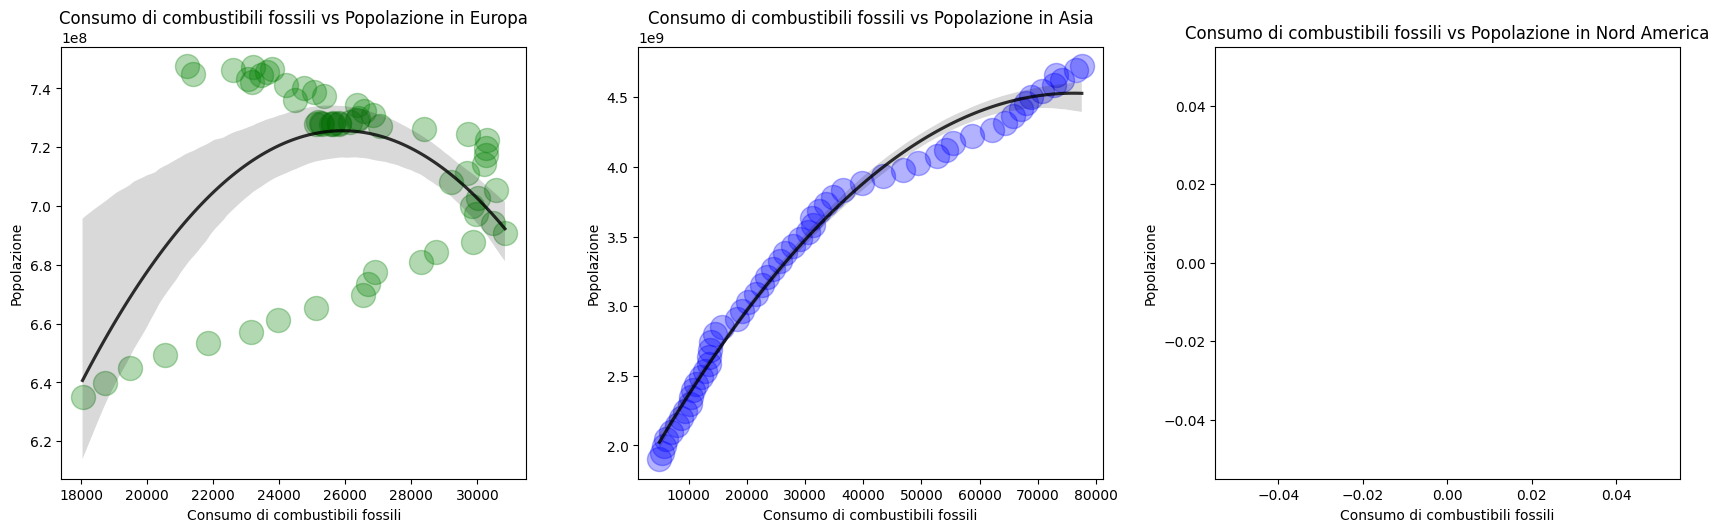

In [ ]:
# Crea una figura con 3 sottotrame (subplots)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 riga e 3 colonne
fig.tight_layout(pad=5.0)  # Aggiusta lo spazio tra i grafici

# Grafico per l'Europa
sns.regplot(data=df_europe, x='fossil_fuel_consumption', y='population',
            scatter_kws={'alpha': 0.3, 'color': 'green', 's': 300, 'edgecolor': 'green'},
            line_kws={'color': 'black', 'alpha': 0.8}, order=2, ax=axes[0])
axes[0].set_title('Consumo di combustibili fossili vs Popolazione in Europa')
axes[0].set_xlabel('Consumo di combustibili fossili')
axes[0].set_ylabel('Popolazione')

# Grafico per l'Asia
sns.regplot(data=df_Asia, x='fossil_fuel_consumption', y='population',
            scatter_kws={'alpha': 0.3, 'color': 'blue', 's': 300, 'edgecolor': 'blue'},
            line_kws={'color': 'black', 'alpha': 0.8}, order=2, ax=axes[1])
axes[1].set_title('Consumo di combustibili fossili vs Popolazione in Asia')
axes[1].set_xlabel('Consumo di combustibili fossili')
axes[1].set_ylabel('Popolazione')

# Grafico per il Nord America
sns.regplot(data=df_NAmerica, x='fossil_fuel_consumption', y='population',
            scatter_kws={'alpha': 0.3, 'color': 'red', 's': 300, 'edgecolor': 'red'},
            line_kws={'color': 'black', 'alpha': 0.8}, order=2, ax=axes[2])
axes[2].set_title('Consumo di combustibili fossili vs Popolazione in Nord America')
axes[2].set_xlabel('Consumo di combustibili fossili')
axes[2].set_ylabel('Popolazione')

# Mostra il grafico
plt.show()


### Focus 2015-2023

In [ ]:

selected_df=['Asia','Europe','North America (EI)']

selected_years=range(2015,2023)
rows_df=column_df[(column_df['country'].isin(selected_df)) & (column_df['year'].isin(selected_years))]

rows_df

,country,year,biofuel_consumption,wind_consumption
1264,Asia,2015,88.450,648.833
1265,Asia,2016,114.514,835.911
1266,Asia,2017,109.429,1040.410
1267,Asia,2018,139.131,1232.154
1268,Asia,2019,168.048,1355.306
1269,Asia,2020,179.257,1518.701
1270,Asia,2021,201.936,2056.826
1271,Asia,2022,219.470,2365.340
6677,Europe,2015,166.499,828.081
6678,Europe,2016,168.694,823.247


In [ ]:
# Stampa i paesi unici nel dataset
print(df['country'].unique())


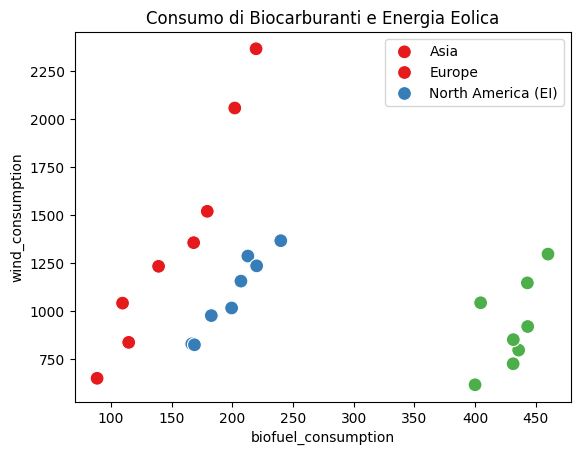

In [ ]:
#DA AGGIUSTARE
#scatter plot sull'utilizzo dei biofuel e vento nei tre continenti scelti
sb.scatterplot(x='biofuel_consumption',  # X-axis
                y='wind_consumption',  # Y-axis
                hue='country',
                palette='Set1',
                s=100,
                data=rows_df)
# Creare la legenda
plt.legend(labels=selected_df)

# Titolo del grafico
plt.title("Consumo di Biocarburanti e Energia Eolica")

# Mostra il grafico
plt.show()


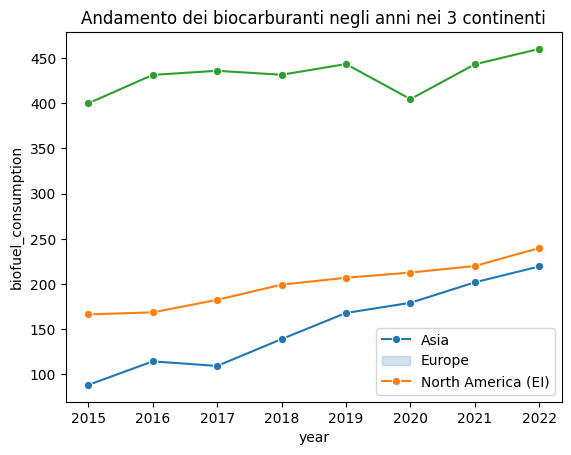

In [ ]:
sb.lineplot(data=rows_df, x='year', y='biofuel_consumption', hue='country', marker='o')
plt.title("Andamento dei biocarburanti negli anni nei 3 continenti")
plt.legend(labels=selected_df)
plt.show()

In [ ]:
selected_df

['Asia', 'Europe', 'North America (EI)']

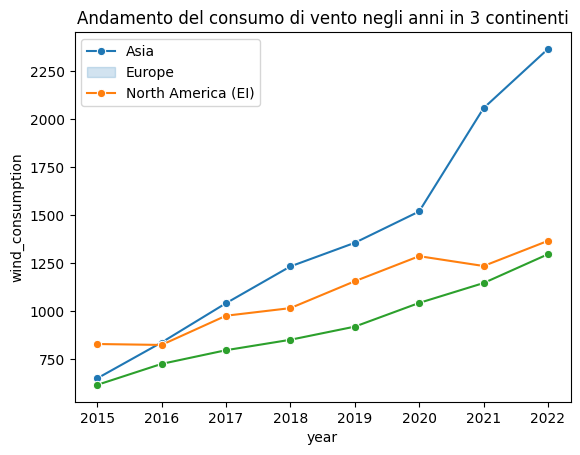

In [ ]:
sb.lineplot(data=rows_df, x='year', y='wind_consumption', hue='country', marker='o')
plt.title("Andamento del consumo di vento negli anni in 3 continenti")
plt.legend(labels=selected_df)
plt.show()

In [ ]:

# Seleziono le colonne di interesse
selected_columns = ['country', 'year', 'biofuel_consumption', 'wind_consumption']

# Creo una copia del DataFrame per evitare il warning SettingWithCopyWarning
column_df = df[selected_columns].copy()

# Rimuovo le righe con valori mancanti
column_df.dropna(inplace=True)

# Rimuovo le colonne con valori mancanti
column_df.dropna(axis=1, inplace=True)

# Mostro le prime righe del DataFrame pulito
column_df.head()  # head() mostra le prime righe del DataFrame


,country,year,biofuel_consumption,wind_consumption
235,Africa,1990,0.0,0.000
236,Africa,1991,0.0,0.000
237,Africa,1992,0.0,0.000
238,Africa,1993,0.0,0.006
239,Africa,1994,0.0,0.016


## Dataset di energie concatenate (opzione)

In [ ]:

col_df = pd.Series(columns).to_frame('column')
col_df

,column
0,country
1,year
2,iso_code
3,population
4,gdp
...,...
124,wind_elec_per_capita
125,wind_electricity
126,wind_energy_per_capita
127,wind_share_elec


In [ ]:
def column_category2(x):
    return '_'.join(re.split("_",x)[:2])

def column_category1(x):
    return '_'.join(re.split("_",x)[:1])

In [ ]:
col_df['column_category1'] = col_df['column'].apply(column_category1)
col_df['column_category2'] = col_df['column'].apply(column_category2)
col_df

,column,column_category1,column_category2,category
0,country,country,country,country
1,year,year,year,year
2,iso_code,iso,iso_code,iso
3,population,population,population,population
4,gdp,gdp,gdp,gdp
...,...,...,...,...
124,wind_elec_per_capita,wind,wind_elec,wind
125,wind_electricity,wind,wind_electricity,wind
126,wind_energy_per_capita,wind,wind_energy,wind
127,wind_share_elec,wind,wind_share,wind


In [ ]:
exception_categories = ['low_carbon','other_renewable','other_renewables']
col_df['category'] = col_df.apply(lambda x: x['column_category2'] if x['column_category2'] in exception_categories else x['column_category1'],axis = 1)

In [ ]:
#suddivisione colonne per tipologia di combustibile
col_df.groupby('category')['column'].count()


,column
category,
biofuel,8
carbon,1
coal,12
country,1
electricity,3
energy,4
fossil,8
gas,12
gdp,1


In [ ]:
col_df2 = col_df.groupby('category')['column'].apply(lambda x: list(x.values)).to_frame()
col_df2['count'] = col_df2['column'].apply(lambda x: len(x))
col_df2.head()

,column,count
category,,
biofuel,"[biofuel_cons_change_pct, biofuel_cons_change_...",8
carbon,[carbon_intensity_elec],1
coal,"[coal_cons_change_pct, coal_cons_change_twh, c...",12
country,[country],1
electricity,"[electricity_demand, electricity_generation, e...",3


In [ ]:
col_df2[col_df2['count']>1]


In [ ]:
category_dict = col_df2[col_df2['count']>1]['column'].to_dict()
for i in category_dict.keys():
    print (i+"_list = category_dict['"+ i + "']")

In [ ]:
#raggruppo tutte le tipologie di fonti di energia per macrocategorie
biofuel_list = category_dict['biofuel']
coal_list = category_dict['coal']
electricity_list = category_dict['electricity']
energy_list = category_dict['energy']
fossil_list = category_dict['fossil']
gas_list = category_dict['gas']
hydro_list = category_dict['hydro']
low_carbon_list = category_dict['low_carbon']
net_list = category_dict['net']
nuclear_list = category_dict['nuclear']
oil_list = category_dict['oil']
other_renewable_list = category_dict['other_renewable']
other_renewables_list = category_dict['other_renewables']
renewables_list = category_dict['renewables']
solar_list = category_dict['solar']
wind_list = category_dict['wind']


In [ ]:
#ogni categoria ha una lista concatenata con le varie tipologie di fonti per quella categoria
other_renewable_list

['other_renewable_consumption',
 'other_renewable_electricity',
 'other_renewable_exc_biofuel_electricity']